In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Twitter Scraping Part



In [ ]:
%%capture
!pip3 install twint
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [ ]:
import os
import pandas as pd

def scrape_tw(since, until, keywords, output_dir):
  '''
    - since (str)      : starting date for scraping. Exp: 2020-01-01 15:30:00
    - until (str)      : ending date for scraping.   Exp: 2021-01-01 16:00:00
    - keywords (list)  : which words do you want to scrape on twitter.
    - output_dir (str) : the path where the csv file will be saved.
  '''

  keys = keywords[0]
  if len(keywords) > 1:
    for keyword in keywords[1:]:
      keys += " OR " + keyword
  print("Keys: " + keys)

  first_until = until
  uncut_output = output_dir + '/' + keywords[0] + '_' + since.split()[0] + '_' + since.split()[1] + '_' + first_until.split()[0] + '_' + first_until.split()[1] + '.csv'

  keep = 0
  while keep == 0:
    output = output_dir + '/' + keywords[0] + '_' + since.split()[0] + '_' + since.split()[1] + '_' + until.split()[0] + '_' + until.split()[1] + '.csv'
    call = 'twint -o "' + output + '" --csv --tabs -s "' + keys + '" --since "' + since + '" --until "' + until + '"'
    a = os.system(call)
    print(a, call)

    df = pd.read_csv(output, sep = '\t')
    ctrl = df.iloc[-1]['date'] + ' ' + df.iloc[-1]['time'] 
    print(ctrl)
    if ctrl.split()[0] == since.split()[0] and ctrl.split()[1].split(':')[0] == since.split()[1].split(':')[0] and ctrl.split()[1].split(':')[1] == since.split()[1].split(':')[1]:
      if output == uncut_output:
        print("File saved here: " + uncut_output)
      else:
        print("File saved here: " + output)
      keep = 1
    else:
      new_name = output_dir + '/' + keywords[0] + '_' + ctrl.split()[0] + '_' + ctrl.split()[1] + '_' + until.split()[0] + '_' + until.split()[1] + '.csv'
      os.rename(output, new_name)
      print("File saved here: " + new_name)
      until = ctrl
      keep = 1

In [ ]:
scrape_tw("2021-12-05 00:00:00", "2021-12-15 00:00:00", ["#sigarazammi", "#sigarazammı"], "/content/drive/MyDrive/NLP_Proje/sigara_tweets")

In [ ]:
scrape_tw("2021-12-05 00:00:00", "2021-12-15 00:00:00", ["#hekimlerhaklariniistiyor", "#hekimlerhaklarınıistiyor"], "/content/drive/MyDrive/NLP_Proje/hekim_tweets")

In [ ]:
scrape_tw("2021-12-05 00:00:00", "2021-12-15 00:00:00", ["#asgariucret", "#asgariücret"], "/content/drive/MyDrive/NLP_Proje/asgari_tweets")

In [ ]:
scrape_tw("2021-12-17 00:00:00", "2021-12-19 23:00:00", ["#karyagiyor", "#karyağıyor"], "/content/drive/MyDrive/NLP_Proje/deneme_tweets")

In [ ]:
scrape_tw("2021-12-17 00:00:00", "2021-12-19 23:00:00", ["#KilicdaroglundanOnlineEgitim", "#KılıçdaroğlundanOnlineEğitim"], "/content/drive/MyDrive/NLP_Proje/deneme_tweets")

## Imports

*   Turkish Stemmer https://github.com/otuncelli/turkish-stemmer-python



In [ ]:
!pip install TurkishStemmer
from TurkishStemmer import TurkishStemmer
import pandas as pd
import re
import numpy as np
import string
from sklearn.cluster import KMeans
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
import string
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from keras.preprocessing.text import Tokenizer
import scipy.stats
import seaborn as sns

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Glove to Word2Vec


*   Turkish GloVe Model (253K Vocab, uncased, 300d vectors, 720 MB Text) https://github.com/inzva/Turkish-GloVe

In [ ]:
glove_file = '/content/drive/MyDrive/NLP_Proje/vectors_inzva/vectors.txt'
word2vec_file = "/content/drive/MyDrive/NLP_Proje/vectors_inzva/word2Vec.txt"

glove2word2vec(glove_file, word2vec_file)

(253832, 300)

In [ ]:
word2vec_file = "/content/drive/MyDrive/NLP_Proje/vectors_inzva/word2Vec.txt"

model = KeyedVectors.load_word2vec_format(word2vec_file)

In [ ]:
import pickle
filename = '/content/drive/MyDrive/NLP_Proje/word_model_TR.pkl'
model = pickle.load(open(filename, 'rb'))

In [ ]:
model.most_similar('kedi')

[('köpek', 0.877784788608551),
 ('kediler', 0.783628523349762),
 ('yavru', 0.7639464735984802),
 ('köpekler', 0.7404902577400208),
 ('kedinin', 0.703307032585144),
 ('kedilerin', 0.6890144348144531),
 ('evcil', 0.6781024932861328),
 ('yavrusu', 0.6608652472496033),
 ('köpeği', 0.6590757369995117),
 ('kedisi', 0.6555072069168091)]

In [ ]:
model.get_vector('köpek')

array([ 0.256267, -0.021196, -0.382486, -0.446852,  0.264941,  0.800656,
        1.049214,  0.382619,  0.387992, -0.819199, -0.064635, -0.065528,
       -0.392111, -0.828452,  0.242283,  0.327713, -0.007408,  0.331988,
       -0.307131,  0.664655, -0.14908 , -0.575605, -0.260167,  0.044445,
        0.149747,  0.179367, -0.249585, -0.40627 , -0.650553, -0.113684,
       -0.242615, -0.281841, -0.04495 ,  0.094395,  0.260927, -0.114695,
        0.087102, -0.34001 ,  0.432794, -0.070156, -0.036803, -0.140537,
        0.102691, -0.409482, -1.05083 , -0.446413,  1.10028 , -0.202133,
        0.342844,  0.189706,  0.016197,  0.39591 , -0.875412,  0.881661,
       -0.092764,  0.177535, -0.893876,  0.600849, -0.446912, -0.658256,
        0.299496, -0.234381,  0.301356,  0.147955, -0.336747,  0.231281,
       -0.036802, -0.53809 ,  0.360561, -0.198792, -0.124435,  0.411871,
       -0.456501, -0.114604, -0.696664, -0.386749, -0.00712 , -0.206675,
       -0.292143, -0.159463, -0.609105, -0.200418, 

## Preprocessing Functions

In [ ]:
def remove_punctuation(text):
  PUNCT_TO_REMOVE = string.punctuation
  return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [ ]:
def find_bow(sentence):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentence)
    sequences = tokenizer.texts_to_sequences(sentence)
    word_index = tokenizer.word_index 
    bow = {}
    for key in word_index:
        bow[key] = sequences[0].count(word_index[key])

    return bow, len(word_index)

In [ ]:
def prepare_data(df, model, stemming):
  '''
    - df    : DataFrame for preparation
    - model : Word vectors for calculating sentence vectors
    - stemming : True or False
  '''

  df = df.drop_duplicates().reset_index(drop=True)
  df['text'] = df['text'].str.lower()
  df['text'] = [text.replace('_', ' ') for text in df['text']] # '_' can be used between words

  for k in range(len(df)):
    df['text'][k] = re.sub(r'http\S+', '', str(df['text'][k])) # remove links
    df['text'][k] = re.sub(r'@\S+', '', str(df['text'][k])) # remove usertags
    
  df['text'] = df['text'].apply(lambda text: remove_punctuation(text))


  docs = df['text']
  docs_list = []

  WPT = nltk.WordPunctTokenizer()
  stop_word_list = nltk.corpus.stopwords.words('turkish')
      
  for doc in docs:
      doc = re.sub("\d+"," ",doc) # remove numbers
      doc = WPT.tokenize(doc)
      filtered_tokens = [item for item in doc if item not in stop_word_list]
      lemma = nltk.WordNetLemmatizer()
      lemma_word = [lemma.lemmatize(word) for word in filtered_tokens]

      doc = " ".join(lemma_word)

      docs_list.append(doc)

  df['text'] = pd.DataFrame(docs_list, columns=['text'])

  filter = []
  for i in df['text']: # remove sample if all words are stop words  
    if len(i) == 0:
      filter.append(False)
    else:
      filter.append(True)
  df = df[filter]
  df = df.reset_index(drop=True)

  if stemming:
    stemmer = TurkishStemmer()
    for i, text in enumerate(df['text']):
      word_list = text.split()
      new_sentence = ""
      for word in word_list:
        new_word = stemmer.stem(word)
        new_sentence += (" " + new_word)

      df['text'][i] = new_sentence

  df['vectors'] = [np.zeros(300) for i in range(len(df))]
  not_found = 0
  for i,tweet in enumerate(df['text']):
    bow, count = find_bow([tweet])
    word_list = list(bow.keys()) # finding bag of words for a sample
    avg_vector = np.zeros(300) 
    for word in word_list:
      try:
        avg_vector += model.get_vector(word) # finding vectors of these words
        count += 1
      except:
        not_found += 1
    if count != 0:
      df['vectors'][i] = avg_vector/count # taking average of all words in bag of words for this sample 
  
  print("Average words which are not found in sentences : " + str(not_found/len(df)))

  # drop sample if any word in sample is not in vocabulary
  drop_list = []
  [drop_list.append(k) for k,i in enumerate(df['vectors']) if i.sum() == 0]
  print("Dropped lines after vectorization: " + str(len(drop_list)))
  df = df.drop(drop_list).reset_index(drop=True)
  print("Number of remaining samples: " + str(len(df)))

  print("Value counts for categories :\n")
  print(df['category'].value_counts())
  return df

In [ ]:
def assing_labels(df, assign_label_dict):
  df['labels'] = np.zeros((len(df)), dtype=int)
  for i in range(len(df)):
    df['labels'][i] = assign_label_dict[df['category'][i]]
  df = df.sample(frac=1).reset_index(drop=True)
  return df

## KMeans Model

In [ ]:
def ent(data):
    """
    Calculates entropy of the passed `pd.Series`
    """
    p_data = data.value_counts()           # counts occurrence of each value
    entropy = scipy.stats.entropy(p_data)  # get entropy from counts
    return entropy

In [ ]:
def average_entropy(df):
  sum_ent = 0
  n_clusters = len(df['clusters'].value_counts())
  for i in range(n_clusters):
    sum_ent += ent(df[df['clusters'] == i]['labels'])
  return sum_ent/n_clusters

In [ ]:
def train_kmeans(df):
  X = np.array([np.array([*arr]) for arr in [vector for _,vector in enumerate(df["vectors"], 0)]])
  y = np.array(df['labels'])

  kmeans = KMeans(n_clusters=len(df['labels'].unique()))
  kmeans.fit(X)

  df['clusters'] = kmeans.labels_

  avg_ent = average_entropy(df)

  return kmeans, avg_ent

In [ ]:
def check_cluster_dist(df, cluster):
  ctrl_df = pd.DataFrame(df[df['clusters'] == cluster]['labels'].value_counts()).reset_index()

  for i in range(len(ctrl_df)):
    ctrl_df['index'][i] = assign_dict[ctrl_df['index'][i]]
  sns.histplot(data=df[df['clusters']==cluster], x = 'labels')
  return ctrl_df

## Predict Text Category

In [ ]:
def assign_dict_clusters(assign_dict, kmeans, df):
  '''
    - assign_dict (dict)    : dictionary for labels of hashtags
    - kmeans (model)        : fitted kmeans model for taking its cluster labels
    - df (DataFrame) : used dataframe for training 
  '''
  assign_dict_clusters = {}

  for cluster in np.unique(kmeans.labels_):
    index = df[df['clusters'] == cluster]['labels'].value_counts().reset_index().iloc[0]['index']
    assign_dict_clusters[cluster] = assign_dict[index]
    
  return assign_dict_clusters

In [ ]:
def predict_text(text, assign_dict, kmeans, model):
  '''
    - text (str)               : string for prediction
    - dict_for_clusters (dict) : dictionary for cluster labels of hashtags
    - kmeans                   : model for predict the cluster of given vector
    - model                    : model for taking vector values of words
  '''
  dict_for_clusters = assign_dict_clusters(assign_dict, kmeans, df)
  text = text.lower()
  text = remove_punctuation(text)

  WPT = nltk.WordPunctTokenizer()
  stop_word_list = nltk.corpus.stopwords.words('turkish')

  text = re.sub("\d+"," ",text) # remove numbers
  text = WPT.tokenize(text)
  filtered_tokens = [item for item in text if item not in stop_word_list]
  lemma = nltk.WordNetLemmatizer()
  lemma_word = [lemma.lemmatize(word) for word in filtered_tokens]

  text = " ".join(lemma_word)

  not_found = 0
  bow, count = find_bow([text])
  word_list = list(bow.keys()) # finding bag of words for a sample
  avg_vector = np.zeros(300) 
  for word in word_list:
    try:
      avg_vector += model.get_vector(word) # finding vectors of these words
    except:
      not_found += 1
  if count != 0:
    avg_vector = avg_vector/count # taking average of all words in bag of words for this sample 

  avg_vector = avg_vector.reshape(1,-1)
  prediction = dict_for_clusters[kmeans.predict(avg_vector)[0]]

  return prediction

## Datasets

*   Used datasets are : 
    *   A Benchmark Data for Turkish Text Categorization https://www.kaggle.com/savasy/ttc4900 (Thanks to YTU Kemik Group)
    *   Turkish Tweets Dataset https://www.kaggle.com/anil1055/turkish-tweet-dataset/version/1
    *   Dataset which crawled from Twitter with trend topic hashtags. Used crawler library is: https://github.com/twintproject/twint 

*  Data has to has two columns named 'text' and 'category' for the preparation function.




### A Benchmark Data for Turkish Text Categorization Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP_Proje/7allV03.csv')

In [ ]:
df

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
...,...,...
4895,teknoloji,iphone lara geri dönüyor ios 6 sürümüyle tele...
4896,teknoloji,muslukta devrim sadece elimizi yıkadığımız mu...
4897,teknoloji,halka iyi anlatılmalı bilgi_teknolojileri ile...
4898,teknoloji,çöpe gidiyorlar apple 775 bin uygulamayla app...


In [ ]:
df = prepare_data(df, model, stemming=False)

Average words which are not found in sentences : 6.544933920704846
Dropped lines after vectorization: 0
Number of remaining samples: 4540
Value counts for categories :

siyaset       690
ekonomi       690
dunya         677
teknoloji     648
spor          636
saglik        632
kultur        567
Name: category, dtype: int64


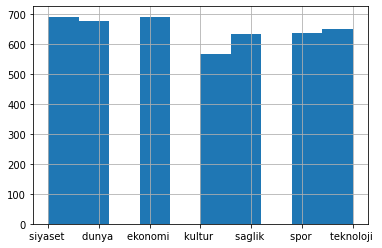

In [ ]:
df['category'].hist()

In [ ]:
df

,category,text,vectors
0,siyaset,milyon ön seçim vaadi mhp nin olağan büyük kur...,"[0.008694885079643194, -0.06842463566533025, -..."
1,siyaset,mesut yılmaz yüce divan ceza alabilirdi prof d...,"[-0.04343191547274377, -0.049366857782721256, ..."
2,siyaset,disko lar kaldırılıyor başbakan yardımcısı arı...,"[-0.0485837286533437, -0.09778051291906305, -0..."
3,siyaset,sarıgül anayasa mahkemesi gidiyor mustafa sarı...,"[0.04019490080323107, -0.1370624959627904, -0...."
4,siyaset,erdoğan idamın bir haklılık sebebi var demek y...,"[-0.005640744270776656, -0.1168679795921483, -..."
...,...,...,...
4535,teknoloji,iphone lara geri dönüyor io sürümüyle telefon ...,"[0.0380729507068517, -0.09285345078118283, -0...."
4536,teknoloji,muslukta devrim sadece elimizi yıkadığımız mus...,"[0.0032875642788653472, -0.1195428713886495, -..."
4537,teknoloji,halka iyi anlatılmalı bilgi teknolojileri ilet...,"[-0.024545714003384296, -0.12845780437786092, ..."
4538,teknoloji,çöpe gidiyorlar apple bin uygulamayla app stor...,"[-0.010345612156633583, -0.1325809149396798, -..."


In [ ]:
assign_dict  = {0: 'siyaset ', 1: 'ekonomi ', 2: 'dunya ', 3: 'teknoloji ', 4: 'spor ', 5 : 'saglik ', 6: 'kultur '}

assign_label_dict = {v: k for k, v in assign_dict.items()}

In [ ]:
df = assing_labels(df, assign_label_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,category,text,vectors,labels
0,siyaset,uludere  gizlemedik ak parti  nin güneydoğu ...,"[0.009032930835147203, -0.10663219945755219, -...",0
1,ekonomi,ülkeyle havayolu anlaşması sivil havacılık gen...,"[-0.01820349023339576, -0.20133571550782198, -...",1
2,siyaset,gensoru gündeme alınmadı tbmm genel kurulu nda...,"[0.011835361536427894, -0.09870643659393076, -...",0
3,ekonomi,bayraktar kentsel dönüşüme yeni yönetmelik gel...,"[-0.009644610074955333, -0.15261301734074215, ...",1
4,dunya,obama gönderdiği mektupta ifade hatası fransa ...,"[-0.07304066299986077, -0.05177202874875155, -...",2
...,...,...,...,...
4535,teknoloji,yok satan tablet geri dönüyor microsoft un saa...,"[0.048240318487759476, -0.11603661986100633, -...",3
4536,teknoloji,instagram a dava açıldı ünlü fotoğraf paylaşım...,"[0.008445831275024462, -0.1270348256286443, -0...",3
4537,dunya,helikopter düştü ölü iran bir trafik kazasında...,"[-0.110045848287642, -0.2230628164112568, -0.0...",2
4538,dunya,abd milyon insan açlık sınırında yaşıyor abd m...,"[-0.04966891150870899, -0.1957056732894021, -0...",2


In [ ]:
kmeans, avg_ent = train_kmeans(df)

In [ ]:
avg_ent

0.7338377598132173

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,labels
0,dunya,305
1,siyaset,30
2,teknoloji,12
3,saglik,9
4,ekonomi,8
5,spor,5
6,kultur,3


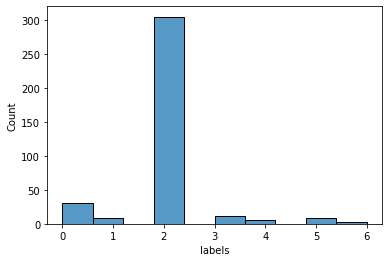

In [ ]:
#0: 'siyaset ' 
#1: 'ekonomi '
#2: 'dunya ' 
#3: 'teknoloji '
#4: 'spor ' 
#5: 'saglik ' 
#6: 'kultur '

check_cluster_dist(df, cluster=2)

In [ ]:
text = input("Enter your tweet for prediction: ")

print("\nThis tweet is about to :\n"+ predict_text(text, assign_dict, kmeans, model))

Enter your tweet for prediction: milletvekili ile görüştüm

This tweet is about to :
siyaset 


### Crawled Dataset

In [ ]:
def pre_preprocessing(df, keywords):
  remove_features = ['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
                   'user_id', 'username', 'name', 'place', 'language', 'mentions',
                   'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
                   'cashtags', 'link', 'retweet', 'quote_url', 'video', 
                   'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
                   'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
                   'trans_dest']
  df = df.drop(remove_features, axis=1)
  df['tweet'] = df['tweet'].str.lower()
  
  filter = []
  for i in df['hashtags']:
    if (i.count(',')+1) <= len(keywords):
      filter.append(True)
    else:
      filter.append(False)
  df = df[filter]
  df = df.reset_index(drop=True)

  df['tweet'] = [i.replace(keywords[0] and keywords[1], '') for i in df['tweet']]
  df['tweet'] = [i.replace(keywords[0] or keywords[1], '') for i in df['tweet']]
    
  filter = []
  for i in df['tweet']:
    if len(i) == 0:
      filter.append(False)
    else:
      filter.append(True)
  df = df[filter]
  df = df.reset_index(drop=True)

  return df

In [ ]:
sigara_path = '/content/drive/MyDrive/NLP_Proje/sigara_tweets/#sigarazammi_2021-12-05_16:07:37_2021-12-06_10:00:00.csv'
hekim_path  = '/content/drive/MyDrive/NLP_Proje/hekim_tweets/#hekimlerhaklariniistiyor_2021-12-05_01:23:47_2021-12-06_10:00:00.csv'
asgari_path = '/content/drive/MyDrive/NLP_Proje/asgari_tweets/#asgariucret_2021-12-06_20:31:22_2021-12-15_00:00:00.csv'

sigara_df = pd.read_csv(sigara_path, sep='\t')
hekim_df  = pd.read_csv(hekim_path, sep='\t')
asgari_df = pd.read_csv(asgari_path, sep='\t')

In [ ]:
sigara_df = pre_preprocessing(sigara_df, ["#sigarazammi", "#sigarazammı"])

In [ ]:
sigara_df

,tweet,hashtags
0,bokmu içek salın artık.,['sigarazammı']
1,çok önemli inşallah daha da zamanır . i̇çmey...,['sigarazammı']
2,haftaya zam girişim 🤦‍♀️😃 https://t.co/bpo7u...,['sigarazammı']
3,otlakçılık artık şerefsizliktir.,['sigarazammı']
4,ben size dedim kimse inanmadı,['sigarazammı']
...,...,...
7011,yine bir zamcık vakası https://t.co/7lnj3vys1l,['sigarazammı']
7012,sığar bile icemicez,['sigarazammı']
7013,geliyor gelmekte olan,['sigarazammı']
7014,zam yapmakla insanlar sigarayı bırakmaz. eğer ...,"['sigara', 'sigarazammı']"


In [ ]:
sigara_pre_df = pd.DataFrame()

In [ ]:
sigara_pre_df['text'] = sigara_df['tweet']
sigara_pre_df['category'] = np.zeros(len(sigara_df), dtype=int)
sigara_pre_df['category'] = "#sigarazammi"

In [ ]:
sigara_pre_df

,text,category
0,bokmu içek salın artık.,#sigarazammi
1,çok önemli inşallah daha da zamanır . i̇çmey...,#sigarazammi
2,haftaya zam girişim 🤦‍♀️😃 https://t.co/bpo7u...,#sigarazammi
3,otlakçılık artık şerefsizliktir.,#sigarazammi
4,ben size dedim kimse inanmadı,#sigarazammi
...,...,...
7011,yine bir zamcık vakası https://t.co/7lnj3vys1l,#sigarazammi
7012,sığar bile icemicez,#sigarazammi
7013,geliyor gelmekte olan,#sigarazammi
7014,zam yapmakla insanlar sigarayı bırakmaz. eğer ...,#sigarazammi


In [ ]:
hekim_df = pre_preprocessing(hekim_df, ["#hekimlerhaklariniistiyor", "#hekimlerhaklarınıistiyor"])

In [ ]:
hekim_df

,tweet,hashtags
0,yurtdışına gitmeden kendi ülkemde hizmet için,['hekimlerhaklariniistiyor']
1,kibir kendini beğenmişlik hastayı aşağılama vs...,['hekimlerhaklarınıistiyor']
2,@r09ffv @haydarbrs i̇şte bu sebepten dolayı ...,['hekimlerhaklarınıistiyor']
3,hepsine tabiki deil sözüm doktor hekim denilin...,['hekimlerhaklarınıistiyor']
4,@hekimsensndk @canan29912273 kafa karistirmaya...,['hekimlerhaklarınıistiyor']
...,...,...
5799,hep diyorsunuz ya hani memnun değilsen git diy...,"['hekimleristifaediyor', 'hekimlerhaklariniist..."
5800,hekimlerde tükenmişlik yerine ahlaki yaralanma...,"['hekimlerhaklariniistiyor', 'hekimleri̇stifae..."
5801,bu kadar istifadan çıkaracağınız sonuç “para” ...,"['hekimleri̇stifaediyor', 'hekimlerhaklariniis..."
5802,ülkedeki 404 yoğun bakım yandal uzmanından bir...,"['hekimleristifaediyor', 'hekimlerhaklariniist..."


In [ ]:
hekim_pre_df = pd.DataFrame()

In [ ]:
hekim_pre_df['text'] = hekim_df['tweet']
hekim_pre_df['category'] = np.zeros(len(hekim_df), dtype=int)
hekim_pre_df['category'] = "#hekimlerhaklariniistiyor"

In [ ]:
hekim_pre_df

,text,category
0,yurtdışına gitmeden kendi ülkemde hizmet için,#hekimlerhaklariniistiyor
1,kibir kendini beğenmişlik hastayı aşağılama vs...,#hekimlerhaklariniistiyor
2,@r09ffv @haydarbrs i̇şte bu sebepten dolayı ...,#hekimlerhaklariniistiyor
3,hepsine tabiki deil sözüm doktor hekim denilin...,#hekimlerhaklariniistiyor
4,@hekimsensndk @canan29912273 kafa karistirmaya...,#hekimlerhaklariniistiyor
...,...,...
5799,hep diyorsunuz ya hani memnun değilsen git diy...,#hekimlerhaklariniistiyor
5800,hekimlerde tükenmişlik yerine ahlaki yaralanma...,#hekimlerhaklariniistiyor
5801,bu kadar istifadan çıkaracağınız sonuç “para” ...,#hekimlerhaklariniistiyor
5802,ülkedeki 404 yoğun bakım yandal uzmanından bir...,#hekimlerhaklariniistiyor


In [ ]:
asgari_df = pre_preprocessing(asgari_df, ["#asgariucret", "#asgariücret"])

In [ ]:
asgari_df

,tweet,hashtags
0,hakkın da konuşuyorlar ama millet mesai yaptı...,['asgariücret']
1,1167 kez kıç silme imkanın ortadan kaybolmuş. ...,['asgariücret']
2,şeyh edebali'nin osman gazi’ye nasihat i̇nsan...,['asgariücret']
3,@qqoqhan @masmaviyim06,['asgariücret']
4,"i̇nsanı yaşatki, devlet yaşasın.",['asgariücret']
...,...,...
5651,aşırı para kaybından ölüyoruz,['asgariücret']
5652,ben bir işsizim işte çalışırken kazandığım sig...,['asgariücret']
5653,türkiye de herşey $ endeksli madem asgari ücre...,['asgariucret']
5654,linin anlamadığı… #haddinibilyeniakit hıı gı...,"['asgariücret', 'haddinibilyeniakit']"


In [ ]:
asgari_pre_df = pd.DataFrame()

In [ ]:
asgari_pre_df['text'] = asgari_df['tweet']
asgari_pre_df['category'] = np.zeros(len(asgari_df), dtype=int)
asgari_pre_df['category'] = "#asgariucret"

In [ ]:
asgari_pre_df

,text,category
0,hakkın da konuşuyorlar ama millet mesai yaptı...,#asgariucret
1,1167 kez kıç silme imkanın ortadan kaybolmuş. ...,#asgariucret
2,şeyh edebali'nin osman gazi’ye nasihat i̇nsan...,#asgariucret
3,@qqoqhan @masmaviyim06,#asgariucret
4,"i̇nsanı yaşatki, devlet yaşasın.",#asgariucret
...,...,...
5651,aşırı para kaybından ölüyoruz,#asgariucret
5652,ben bir işsizim işte çalışırken kazandığım sig...,#asgariucret
5653,türkiye de herşey $ endeksli madem asgari ücre...,#asgariucret
5654,linin anlamadığı… #haddinibilyeniakit hıı gı...,#asgariucret


In [ ]:
df = pd.concat([sigara_pre_df, hekim_pre_df, asgari_pre_df], ignore_index=True)

In [ ]:
df

,text,category
0,bokmu içek salın artık.,#sigarazammi
1,çok önemli inşallah daha da zamanır . i̇çmey...,#sigarazammi
2,haftaya zam girişim 🤦‍♀️😃 https://t.co/bpo7u...,#sigarazammi
3,otlakçılık artık şerefsizliktir.,#sigarazammi
4,ben size dedim kimse inanmadı,#sigarazammi
...,...,...
18471,aşırı para kaybından ölüyoruz,#asgariucret
18472,ben bir işsizim işte çalışırken kazandığım sig...,#asgariucret
18473,türkiye de herşey $ endeksli madem asgari ücre...,#asgariucret
18474,linin anlamadığı… #haddinibilyeniakit hıı gı...,#asgariucret


In [ ]:
df = prepare_data(df, model, stemming=False)

Average words which are not found in sentences : 1.284648629447635
Dropped lines after vectorization: 472
Number of remaining samples: 16419
Value counts for categories :

#sigarazammi                 6597
#asgariucret                 5099
#hekimlerhaklariniistiyor    4723
Name: category, dtype: int64


In [ ]:
df

,text,category,vectors
0,bokmu içek salın artık,#sigarazammi,"[-0.006297499717523654, -0.048447332655390106,..."
1,önemli inşallah zamanır i ̇ çmeyin neyinize ya...,#sigarazammi,"[0.014511415611882255, -0.03384848981041391, -..."
2,haftaya zam girişim 🤦‍♀️😃,#sigarazammi,"[0.0002127148743186678, -0.14049614327294485, ..."
3,otlakçılık artık şerefsizliktir,#sigarazammi,"[0.0020000000949949026, -0.061715248972177505,..."
4,ben size dedim kimse inanmadı,#sigarazammi,"[-0.03298250045627356, 0.1001444038003683, 0.0..."
...,...,...,...
16414,aşırı para kaybından ölüyoruz,#asgariucret,"[0.0050240010023117065, -0.08050999790430069, ..."
16415,ben bir işsizim işte çalışırken kazandığım sig...,#asgariucret,"[0.006287966534251072, 0.034830457063346004, -..."
16416,türkiye herşey endeksli madem asgari ücreti a ...,#asgariucret,"[0.020473185598988225, -0.0994588145468798, 0...."
16417,linin anlamadığı … haddinibilyeniakit hıı gızd...,#asgariucret,"[-0.036235334972540535, 0.020075249175230663, ..."


In [ ]:
assign_dict  = {0: '#sigarazammi', 1: '#hekimlerhaklariniistiyor', 2: '#asgariucret'}

assign_label_dict = {v: k for k, v in assign_dict.items()}

In [ ]:
df = assing_labels(df, assign_label_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,text,category,vectors,labels
0,resmen kuru ekmeğe bile muhtaç duruma düşürece...,#sigarazammi,"[-0.022908427309067475, -0.015464904274614085,...",0
1,sabah sabah petrol market gezdiren sigarayı bı...,#sigarazammi,"[0.010530736052284115, -0.08770873495622684, -...",0
2,bunun acısını yaşayandan başka bilen yok eyhük...,#asgariucret,"[-0.03691649933656057, -0.006258334343632062, ...",2
3,yetişmesi milyonlar harcadığınız doktorlar yur...,#hekimlerhaklariniistiyor,"[-0.017104154022840354, -0.05418845953849646, ...",1
4,hastaneler ticarethanekârhane değildir kalitel...,#hekimlerhaklariniistiyor,"[-0.051668094515445684, -0.07250466778697003, ...",1
...,...,...,...,...
16414,bizim alamadığımız yağı şekeri bulgarlar gelip...,#asgariucret,"[0.0962269997689873, 0.008634790467719236, 0.0...",2
16415,noldu neyi bekliyorlar,#asgariucret,"[0.02701150377591451, 0.10149933149417241, 0.0...",2
16416,sigara tl olmuş teşekkürler,#sigarazammi,"[0.07400287687778473, 0.0707746185362339, 0.07...",0
16417,öncelikle türkiye ’ nin tütün diyarı adıyaman ...,#sigarazammi,"[-0.0151851589203273, -0.06259978954729281, -0...",0


In [ ]:
kmeans, avg_ent = train_kmeans(df)

In [ ]:
avg_ent

0.9716245852980006

In [ ]:
check_cluster_dist(df, cluster=2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,labels
0,#sigarazammi,3046
1,#asgariucret,1243
2,#hekimlerhaklariniistiyor,945


In [ ]:
text = input("Enter your tweet for prediction: ")

print("\nThis tweet is about to :\n"+ predict_text(text, assign_dict, kmeans, model))

Enter your tweet for prediction: doktor olmak çok zor

This tweet is about to :
#hekimlerhaklariniistiyor


### Turkish Tweets Dataset

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/NLP_Proje/TurkishTweets.xlsx')

In [ ]:
df = df.dropna()
df

,Tweet,Etiket
0,Allah'ım çıldıracağım. Yemin ederim çıldıracağ...,kızgın
1,site ne zaman çalıştıda ürün stokları bitti di...,kızgın
2,Sebebi neydi ki diye bağıracağım şimdi az kaldı,kızgın
3,Black friday ne amk bu yıl çıkardınız bu bokud...,kızgın
4,kısa kısa cevaplar vericeksen niye yazıyorsun ...,kızgın
...,...,...
3995,Aynı şeyleri yapmaktan sıkıldım,üzgün
3996,"Olacağı varsa oluyor ya hani, biteceği varsa d...",üzgün
3997,Çok şey istiyorum ama sonu hep fiyasko MUTSUZUM,üzgün
3998,Garip bir şekilde canım çok yanıyor moralim bozuk,üzgün


In [ ]:
df_ = pd.DataFrame()

df_['text'] = df['Tweet']
df_['category'] = df['Etiket']

In [ ]:
df = prepare_data(df_, model, stemming=False)

Average words which are not found in sentences : 0.5832484725050916
Dropped lines after vectorization: 0
Number of remaining samples: 3928
Value counts for categories :

mutlu      796
kızgın     787
üzgün      787
korku      782
surpriz    776
Name: category, dtype: int64


In [ ]:
df

,text,category,vectors
0,allahım çıldıracağım yemin ederim çıldıracağım...,kızgın,"[0.06585203884885861, 0.04506777062152441, 0.0..."
1,site zaman çalıştıda ürün stokları bitti diyor...,kızgın,"[0.05129787034314612, -0.032410653389018516, 0..."
2,sebebi neydi bağıracağım şimdi kaldı,kızgın,"[-0.003986111945576138, -0.0860304424746169, -..."
3,black friday amk yıl çıkardınız bokuda mal mıs...,kızgın,"[0.04001164633561583, 0.017934882465530846, 0...."
4,kısa kısa cevaplar vericeksen yazıyorsun geriz...,kızgın,"[-0.06598899886012077, 0.14149700063798162, 0...."
...,...,...,...
3923,aynı şeyleri yapmaktan sıkıldım,üzgün,"[-0.11304675042629242, -0.004503002390265465, ..."
3924,olacağı varsa oluyor hani biteceği varsa bitsi...,üzgün,"[0.04273071326315403, -0.009923715676580156, 0..."
3925,istiyorum sonu fiyasko mutsuzum,üzgün,"[0.06763112917542458, -0.08330624818336219, 0...."
3926,garip bir şekilde canım yanıyor moralim bozuk,üzgün,"[0.008499643100159509, 0.015877928318721906, -..."


In [ ]:
assign_dict  = {0: 'mutlu', 1: 'üzgün', 2: 'kızgın', 3: 'korku', 4: 'surpriz'}

assign_label_dict = {v: k for k, v in assign_dict.items()}

In [ ]:
df = assing_labels(df, assign_label_dict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,text,category,vectors,labels
0,güzel burunlu iyi kalpli insanları koruma dern...,mutlu,"[0.06145772907453088, 0.0243975784128102, 0.00...",0
1,yok artık inanmam ben seni benden küçük sanıyo...,surpriz,"[-0.01089835052844137, 0.15027005225419998, -0...",4
2,sınavdan sonra tane not kağıdı resmini sildim ...,mutlu,"[-0.03450900109277831, 0.03363594599068165, -0...",0
3,soyisimlerinizi kullanarak bir yerlere gelmeni...,kızgın,"[-0.057856306863518864, -0.01056446206684296, ...",2
4,penaltıdan olmak üzere şut attım fakat gol olm...,kızgın,"[-0.03523114341355506, -0.11538304636875789, -...",2
...,...,...,...,...
3923,kandırılan bunca cahili peşinden getiriyor şaş...,surpriz,"[-0.03402994407547845, 0.0801316120972236, -0....",4
3924,son dakikaları güzel geçiyor bursa maçının,mutlu,"[0.08825366695721944, -0.2290384970450153, -0....",0
3925,yükseklik korkum yok uçak fobim var uçağı görü...,korku,"[0.010867187316762283, -0.03356368782988284, 0...",3
3926,yaşında görünmekten sıkıldım yeminlen sıkıldım...,üzgün,"[-0.013428428343364171, 0.0746576434799603, -0...",1


In [ ]:
kmeans, avg_ent = train_kmeans(df)

In [ ]:
avg_ent

1.3968957510449758

In [ ]:
check_cluster_dist(df, cluster=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,index,labels
0,korku,279
1,surpriz,190
2,kızgın,153
3,üzgün,105
4,mutlu,93


In [ ]:
text = input("Enter your tweet for prediction: ")

print("\nThis tweet is about to :\n"+ predict_text(text, assign_dict, kmeans, model))

Enter your tweet for prediction: yaşasın hayat çok güzel

This tweet is about to :
mutlu
